In [82]:
pip install xgboost

In [83]:
#IMPORT LIBRARIES

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#UPLOAD DATA SET
df = pd.read_csv('Makaan_Properties_Buy_Dataset.csv',encoding='latin-1')

In [85]:
df

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,2486,5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,5324,8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332091,Rajlaxmi RaajLaxmi Towers,10324765,Apartment,Under Construction,9826,4 months ago,https://www.makaan.com/mumbai/rajlaxmi-develop...,561277.0,Rajlaxmi Developers Mumbai,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
332092,Rajlaxmi RaajLaxmi Towers,15076701,Apartment,Under Construction,8568,4 months ago,https://www.makaan.com/mumbai/rajlaxmi-develop...,561277.0,Rajlaxmi Developers Mumbai,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
332093,Rajlaxmi RaajLaxmi Towers,10324762,Apartment,Under Construction,9861,4 months ago,https://www.makaan.com/mumbai/rajlaxmi-develop...,561277.0,Rajlaxmi Developers Mumbai,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
332094,Rajlaxmi RaajLaxmi Towers,15076700,Apartment,Under Construction,8813,4 months ago,https://www.makaan.com/mumbai/rajlaxmi-develop...,561277.0,Rajlaxmi Developers Mumbai,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332096 entries, 0 to 332095
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             217826 non-null  object 
 1   Property_id               332096 non-null  int64  
 2   Property_type             332096 non-null  object 
 3   Property_status           271654 non-null  object 
 4   Price_per_unit_area       332096 non-null  int64  
 5   Posted_On                 332096 non-null  object 
 6   Project_URL               332096 non-null  object 
 7   builder_id                149978 non-null  float64
 8   Builder_name              149978 non-null  object 
 9   Property_building_status  332096 non-null  object 
 10  City_id                   332096 non-null  int64  
 11  City_name                 332096 non-null  object 
 12  No_of_BHK                 332096 non-null  int64  
 13  Locality_ID               332096 non-null  i

In [87]:
#TO drop IRREVELENT COLUMNS
df.drop(['Property_Name','Property_id','Posted_On','Project_URL','builder_id','Builder_name','City_id','Locality_ID','Longitude','Latitude','description','Sub_urban_ID','is_Apartment','is_plot','is_PentaHouse','is_studio','listing_domain_score','Locality_Name','Sub_urban_name'],axis=1,inplace=True)

In [88]:
df

,Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Price,Size,is_furnished,is_RERA_registered,is_ready_to_move,is_commercial_Listing,Listing_Category
0,Apartment,Under Construction,4285,ACTIVE,Ahmedabad,3,7500000,1750,Unfurnished,True,False,False,sell
1,Apartment,Under Construction,7000,ACTIVE,Ahmedabad,4,23688000,3384,Unfurnished,True,False,False,sell
2,Apartment,Ready to move,5752,ACTIVE,Ahmedabad,3,13200840,2295,Unfurnished,False,True,False,sell
3,Apartment,Ready to move,2486,ACTIVE,Ahmedabad,2,2283000,918,Unfurnished,False,True,False,sell
4,Apartment,Under Construction,5324,ACTIVE,Ahmedabad,3,9371000,1760,Unfurnished,True,False,False,sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332091,Apartment,Under Construction,9826,ACTIVE,Mumbai,1,3400000,346,Unfurnished,True,False,False,sell
332092,Apartment,Under Construction,8568,ACTIVE,Mumbai,1,3650000,426,Unfurnished,True,False,False,sell
332093,Apartment,Under Construction,9861,ACTIVE,Mumbai,1,3550000,360,Unfurnished,True,False,False,sell
332094,Apartment,Under Construction,8813,ACTIVE,Mumbai,2,5200000,590,Unfurnished,True,False,False,sell


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332096 entries, 0 to 332095
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Property_type             332096 non-null  object
 1   Property_status           271654 non-null  object
 2   Price_per_unit_area       332096 non-null  int64 
 3   Property_building_status  332096 non-null  object
 4   City_name                 332096 non-null  object
 5   No_of_BHK                 332096 non-null  int64 
 6   Price                     332096 non-null  int64 
 7   Size                      332096 non-null  int64 
 8   is_furnished              332096 non-null  object
 9   is_RERA_registered        332096 non-null  bool  
 10  is_ready_to_move          332096 non-null  bool  
 11  is_commercial_Listing     332096 non-null  bool  
 12  Listing_Category          332096 non-null  object
dtypes: bool(3), int64(4), object(6)
memory usage: 26.3+ MB


In [90]:
numeric_data=df[['Price_per_unit_area','Price','Size','No_of_BHK']]

In [91]:
#TO GET THE BASIC STATs.describe()
df.describe()

,Price_per_unit_area,No_of_BHK,Price,Size
count,332096.000000,332096.000000,3.320960e+05,3.320960e+05
mean,8650.011072,1.733357,1.536295e+07,1.555597e+03
std,10902.350399,1.407407,4.632372e+07,1.910347e+04
min,0.000000,0.000000,3.000000e+03,1.000000e+01
25%,2999.000000,0.000000,2.800000e+06,8.390000e+02
50%,5571.000000,2.000000,6.000000e+06,1.103000e+03
75%,10114.250000,3.000000,1.250000e+07,1.605000e+03
max,200000.000000,15.000000,1.000000e+09,8.712000e+06


In [92]:
#To check The null Values
df.isnull().sum()/len(df)*100

Property_type                0.000000
Property_status             18.200159
Price_per_unit_area          0.000000
Property_building_status     0.000000
City_name                    0.000000
No_of_BHK                    0.000000
Price                        0.000000
Size                         0.000000
is_furnished                 0.000000
is_RERA_registered           0.000000
is_ready_to_move             0.000000
is_commercial_Listing        0.000000
Listing_Category             0.000000
dtype: float64

In [93]:

#used fillna to fill missing values, suppose its above 50 % we can drop that column.
#iloc[0] is used to take as the first occurant value in every problem first i loc is 0.
#here we use mode beecause it is object.

df['Property_status']=df['Property_status'].fillna(df['Property_status'].mode().iloc[0]) 

In [94]:
df.isnull().sum()/len(df)*100

Property_type               0.0
Property_status             0.0
Price_per_unit_area         0.0
Property_building_status    0.0
City_name                   0.0
No_of_BHK                   0.0
Price                       0.0
Size                        0.0
is_furnished                0.0
is_RERA_registered          0.0
is_ready_to_move            0.0
is_commercial_Listing       0.0
Listing_Category            0.0
dtype: float64

In [95]:
# to import the advance stats
import Faris_Stats as fs

In [96]:
for i in numeric_data:
    print('||',i,'||')
    fs.cal_pr(df[i])
    print('='*50)

|| Price_per_unit_area ||
Total Revenue 2872634077
Total_count 332096
Mean 8650.011072099634
median 5571.0
minimum 0
Maximum 200000
range 200000
variance 118860886.31518766
Standard deviation 10902.33398475701
Quartile 1 : 2999.0
quartile 3 : 10114.25
inter quartile range 7115.25
lower_whisker -7673.875
upper_whisker 20787.125
Skewness 4.865035094025007
kurtosis 40.56765628006634
|| Price ||
Total Revenue 5101975694069
Total_count 332096
Mean 15362954.368824074
median 6000000.0
minimum 3000
Maximum 999999999
range 999996999
variance 2145880206978366.0
Standard deviation 46323646.30486644
Quartile 1 : 2800000.0
quartile 3 : 12500000.0
inter quartile range 9700000.0
lower_whisker -11750000.0
upper_whisker 27050000.0
Skewness 11.404753294128742
kurtosis 172.6882595713049
|| Size ||
Total Revenue 516607405
Total_count 332096
Mean 1555.5965895403738
median 1103.0
minimum 10
Maximum 8712000
range 8711990
variance 364941518.7015225
Standard deviation 19103.44258769928
Quartile 1 : 839.0
quart

In [97]:
df.columns

Index(['Property_type', 'Property_status', 'Price_per_unit_area',
       'Property_building_status', 'City_name', 'No_of_BHK', 'Price', 'Size',
       'is_furnished', 'is_RERA_registered', 'is_ready_to_move',
       'is_commercial_Listing', 'Listing_Category'],
      dtype='object')

In [98]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store encoders for each column
label_encoders = {}

# List of categorical columns
cols = df[['Property_type', 'Property_status', 'Property_building_status', 'City_name', 'is_furnished',
        'is_RERA_registered', 'is_ready_to_move', 'is_commercial_Listing', 'Listing_Category']]

# Apply label encoding to each column separately
for i in cols:
    le = LabelEncoder()               # NEW instance every time
    df[i] = le.fit_transform(df[i])
    label_encoders[i] = le         # Store encoder

# Show mappings correctly
for i, le in label_encoders.items():
    print(f"\nMapping for '{i}':")
    for class_index, class_label in enumerate(le.classes_):
        print(f"  {class_label} → {class_index}")


Mapping for 'Property_type':
  Apartment → 0
  Independent Floor → 1
  Independent House → 2
  Residential Plot → 3
  Villa → 4

Mapping for 'Property_status':
  Ready to move → 0
  Under Construction → 1

Mapping for 'Property_building_status':
  ACTIVE → 0
  INACTIVE → 1
  UNVERIFIED → 2

Mapping for 'City_name':
  Ahmedabad → 0
  Bangalore → 1
  Chennai → 2
  Delhi → 3
  Hyderabad → 4
  Kolkata → 5
  Lucknow → 6
  Mumbai → 7

Mapping for 'is_furnished':
  Furnished → 0
  Semi-Furnished → 1
  Unfurnished → 2

Mapping for 'is_RERA_registered':
  False → 0
  True → 1

Mapping for 'is_ready_to_move':
  False → 0
  True → 1

Mapping for 'is_commercial_Listing':
  False → 0

Mapping for 'Listing_Category':
  sell → 0


In [99]:
#for i in label_enc:
    #df[i]=lb.fit_transform(label_enc[i])

|| Price_per_unit_area ||


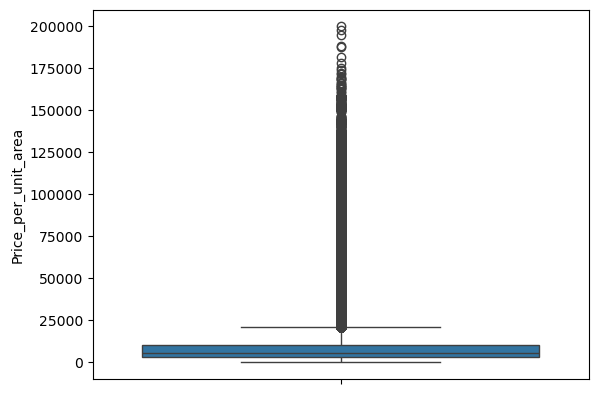

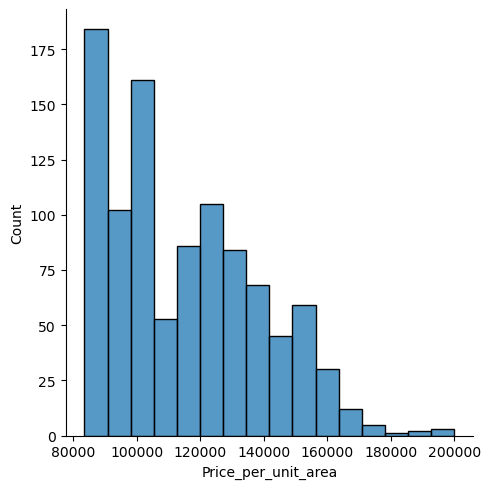

|| Price ||


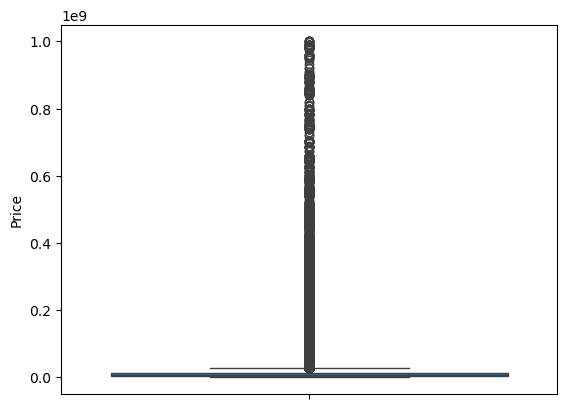

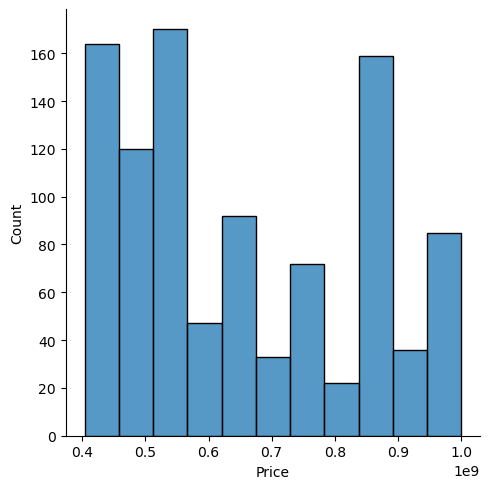

|| Size ||


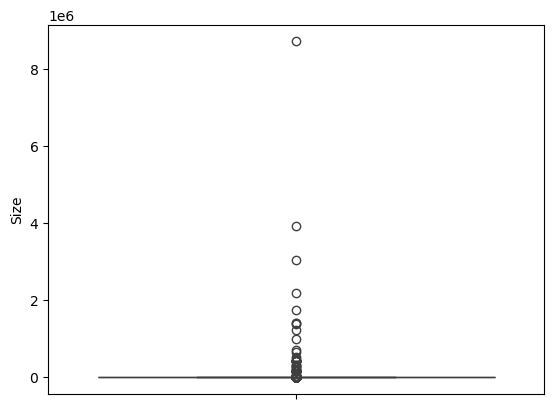

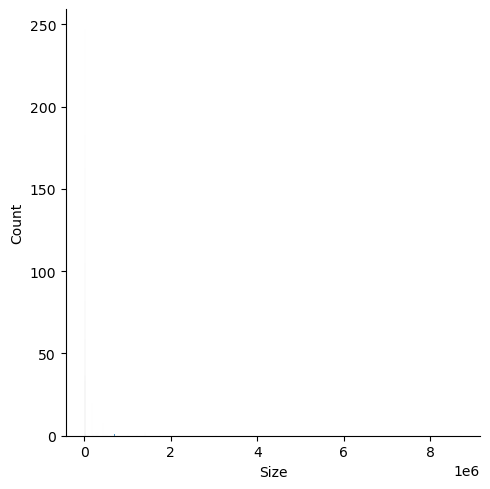

|| No_of_BHK ||


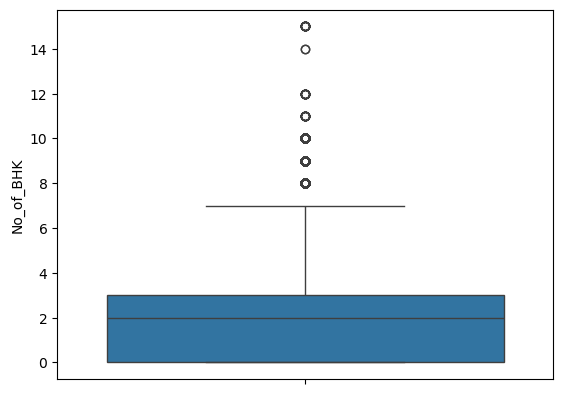

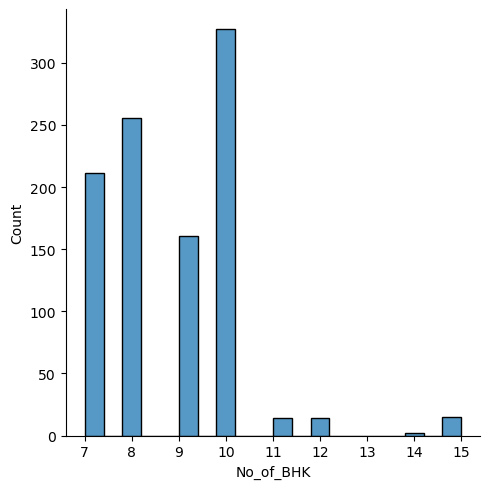

In [100]:
for i in numeric_data:
    print('||',i,'||')
    sns.boxplot(df[i])
    sns.displot(df[i].nlargest(1000))
    plt.show()

|| Price_per_unit_area ||


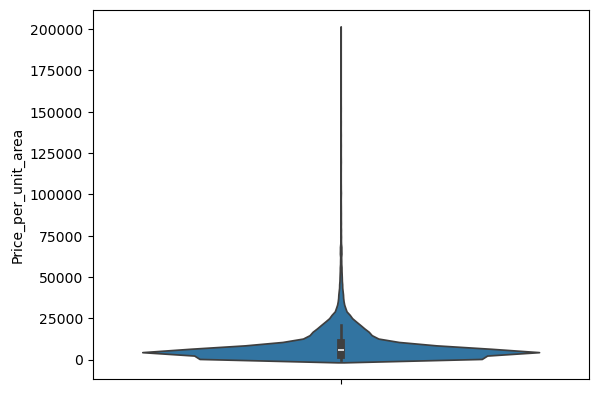

|| Price ||


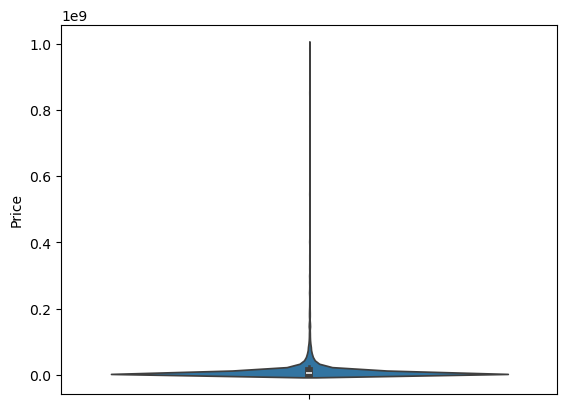

|| Size ||


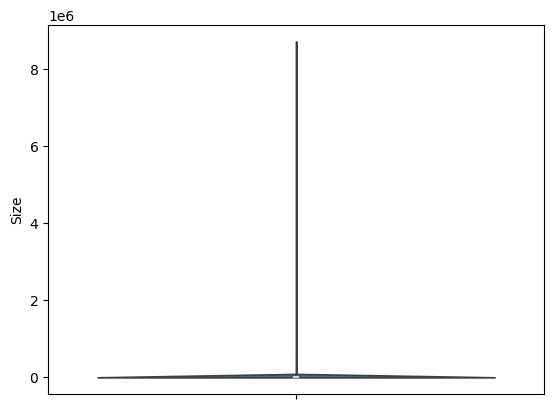

|| No_of_BHK ||


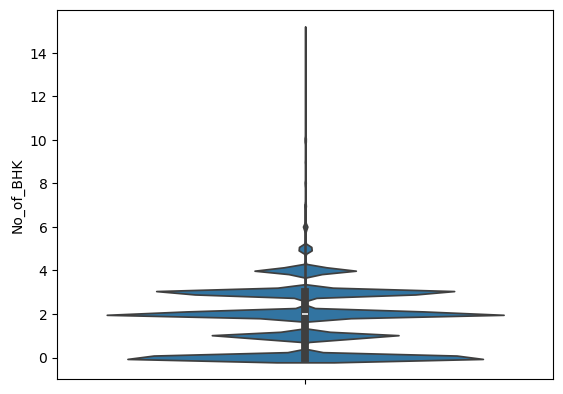

In [101]:
for i in numeric_data:
    print('||',i,'||')
    sns.violinplot(df[i])
    plt.show()

<Axes: >

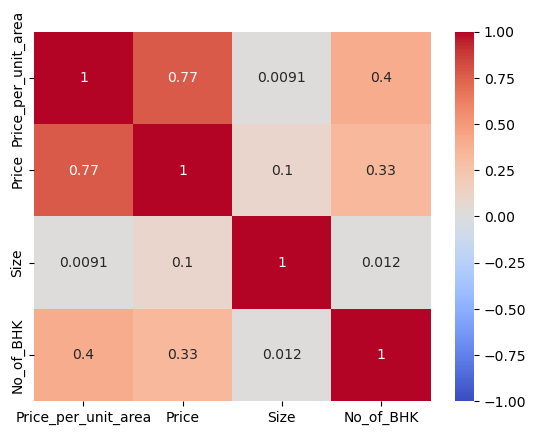

In [102]:
sns.heatmap(numeric_data.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)

Property_type


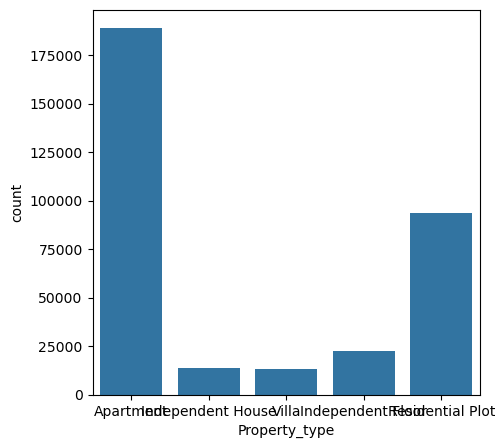

Property_status


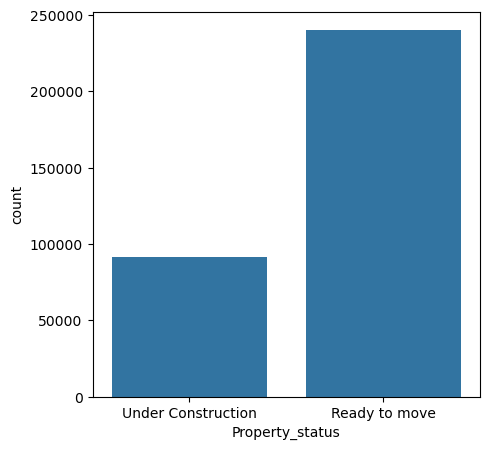

Property_building_status


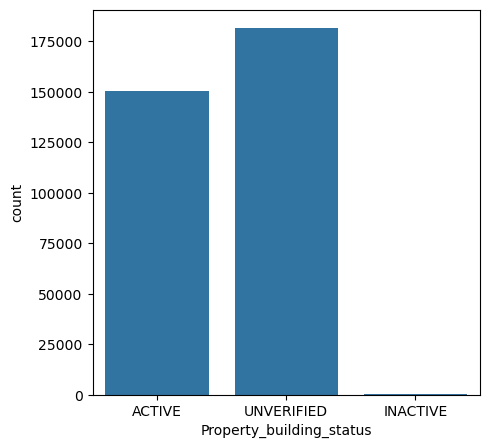

City_name


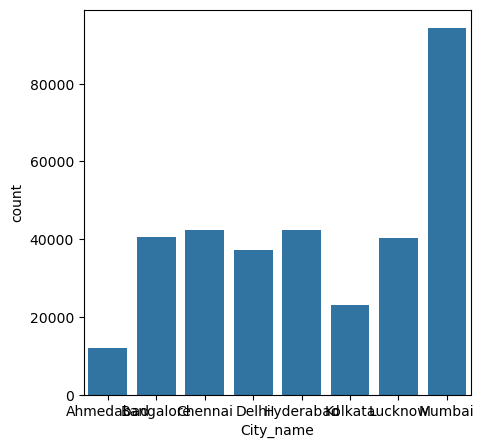

is_furnished


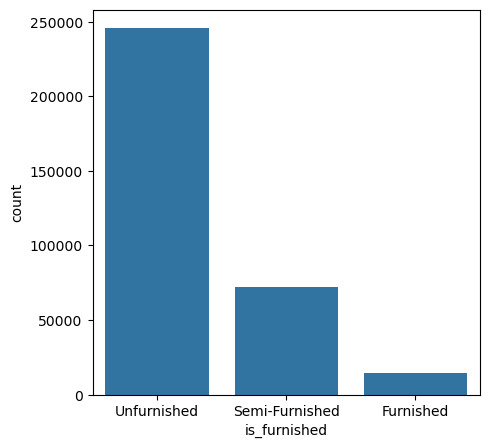

is_RERA_registered


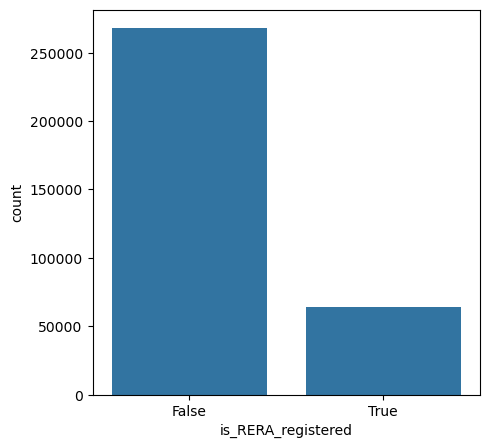

is_ready_to_move


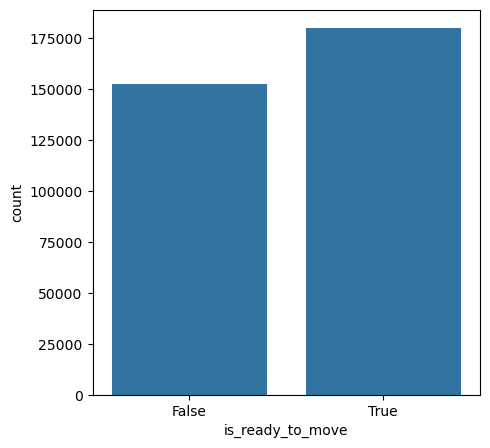

is_commercial_Listing


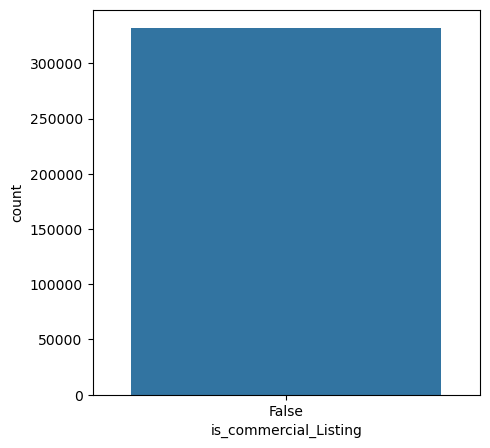

Listing_Category


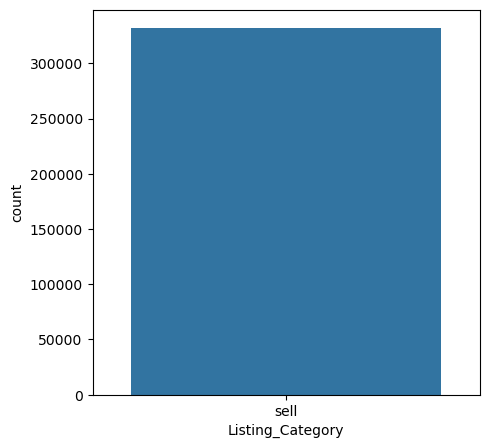

In [103]:
for i in label_enc:
    print(i)
    plt.figure(figsize=(5,5))
    sns.countplot(x=i,data=label_enc)
    plt.show()    

In [104]:
#drop the not effective plots
df.drop(['is_commercial_Listing','Listing_Category'],axis=1,inplace=True)

In [105]:
#TO SPLIT INPUT AND TARGET VALUE
X=df.drop(['Price'],axis=1)
y=df['Price']

In [106]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [107]:
#IMPORT TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [109]:
X_train.shape

(265676, 10)

In [110]:
X_test.shape

(66420, 10)

In [111]:
y_train.shape

(265676,)

In [112]:
y_test.shape

(66420,)

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr=LinearRegression()
lr

LinearRegression()

In [115]:
#FIT THE MODEL
lr.fit(X_train,y_train)

LinearRegression()

In [116]:
y_train_pred=lr.predict(X_train)

In [117]:
y_test_pred=lr.predict(X_test)

evalute the model

In [118]:
from sklearn.metrics import r2_score,root_mean_squared_error

In [119]:
print('r2_score_train : ',r2_score(y_train,y_train_pred))
print('r2_score_test : ' ,r2_score(y_test,y_test_pred))

print('target_mean : ',y_test.mean())


print('RMSE_train : ',root_mean_squared_error(y_train,y_train_pred))
print('RMSE_test : ',root_mean_squared_error(y_test,y_test_pred))

r2_score_train :  0.6866033090561436
r2_score_test :  0.6789020374701894
target_mean :  15517667.684658235
RMSE_train :  25849466.6001828
RMSE_test :  26584197.154662773


USE ANOTHER ALGORITHMS

In [120]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV




LassoCV

In [121]:
ls = LassoCV(cv=5,alphas=[0.01,0.1,1.0,10.0,100])
ls

LassoCV(alphas=[0.01, 0.1, 1.0, 10.0, 100], cv=5)

In [122]:
ls.fit(X_train,y_train)

LassoCV(alphas=[0.01, 0.1, 1.0, 10.0, 100], cv=5)

In [123]:
y_ltrain_pred=ls.predict(X_train)
y_ltest_pred=ls.predict(X_test)

In [124]:
print('r2_score_train : ',r2_score(y_train,y_ltrain_pred))
print('r2_score_test : ' ,r2_score(y_test,y_ltest_pred))

print('target_mean : ',y_test.mean())


print('RMSE_train : ',root_mean_squared_error(y_train,y_ltrain_pred))
print('RMSE_test : ',root_mean_squared_error(y_test,y_ltest_pred))

r2_score_train :  0.686603308907627
r2_score_test :  0.6789019121717765
target_mean :  15517667.684658235
RMSE_train :  25849466.60630775
RMSE_test :  26584202.341487005


RidgeCV

In [125]:
rg=RidgeCV(cv=5,alphas=[0.01,0.1,1.0,10.0,100])
rg

RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100], cv=5)

In [126]:
rg.fit(X_train,y_train)

RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100], cv=5)

In [127]:
y_rtrain_pred=rg.predict(X_train)
y_rtest_pred=rg.predict(X_test)

In [128]:
print('r2_score_train : ',r2_score(y_train,y_rtrain_pred))
print('r2_score_test : ' ,r2_score(y_test,y_rtest_pred))

print('target_mean : ',y_test.mean())


print('RMSE_train : ',root_mean_squared_error(y_train,y_rtrain_pred))
print('RMSE_test : ',root_mean_squared_error(y_test,y_rtest_pred))

r2_score_train :  0.6866031574862403
r2_score_test :  0.6788990066167395
target_mean :  15517667.684658235
RMSE_train :  25849472.851047587
RMSE_test :  26584322.618890096


ElasticNetCV

In [129]:
es=ElasticNetCV(cv=5,l1_ratio=[0.1,0.3,0.5,0.7,0.9,1])
es

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1])

In [130]:
es.fit(X_train,y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1])

In [131]:
y_etrain_pred=es.predict(X_train)

In [132]:
y_etest_pred=es.predict(X_test)

In [133]:
print('r2_score_train : ',r2_score(y_train,y_etrain_pred))
print('r2_score_test : ' ,r2_score(y_test,y_etest_pred))

print('target_mean : ',y_test.mean())


print('RMSE_train : ',root_mean_squared_error(y_train,y_etrain_pred))
print('RMSE_test : ',root_mean_squared_error(y_test,y_etest_pred))

r2_score_train :  0.6854520153809536
r2_score_test :  0.677378806829313
target_mean :  15517667.684658235
RMSE_train :  25896903.35761552
RMSE_test :  26647177.861596223


DICISION TREE

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
dt=DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [136]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [137]:
y_dtrain_pred=dt.predict(X_train)
y_dtest_pred=dt.predict(X_test)

In [138]:
print('r2_score_train : ',r2_score(y_train,y_dtrain_pred))
print('r2_score_test : ' ,r2_score(y_test,y_dtest_pred))

print('target_mean : ',y_test.mean())


print('RMSE_train : ',root_mean_squared_error(y_train,y_dtrain_pred))
print('RMSE_test : ',root_mean_squared_error(y_test,y_dtest_pred))

r2_score_train :  0.9999994577813401
r2_score_test :  0.9967771755857575
target_mean :  15517667.684658235
RMSE_train :  34000.99389687582
RMSE_test :  2663318.44398995


RandomForest

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
rf=RandomForestRegressor()
rf

RandomForestRegressor()

In [141]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [142]:
rf_predict_train=rf.predict(X_train)
rf_predict_test=rf.predict(X_test)

In [143]:
print('r2_score_train : ',r2_score(y_train,rf_predict_train))
print('r2_score_test : ' ,r2_score(y_test,rf_predict_test))

print('target_mean : ',y_test.mean())


print('RMSE_train : ',root_mean_squared_error(y_train,rf_predict_train))
print('RMSE_test : ',root_mean_squared_error(y_test,rf_predict_test))

r2_score_train :  0.9996587768129277
r2_score_test :  0.9973895965438901
target_mean :  15517667.684658235
RMSE_train :  852950.1504615
RMSE_test :  2396947.8876365013


Xgboost & Lgboost

In [144]:
from xgboost import XGBRegressor

In [145]:
xgbr=XGBRegressor()
xgbr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [146]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [147]:
xgbr_predict_train=xgbr.predict(X_train)
xgbr_predict_test=xgbr.predict(X_test)

In [148]:
print('r2_score_train : ',r2_score(y_train,xgbr_predict_train))
print('r2_score_test : ' ,r2_score(y_test,xgbr_predict_test))

print('target_mean : ',y_test.mean())


print('RMSE_train : ',root_mean_squared_error(y_train,xgbr_predict_train))
print('RMSE_test : ',root_mean_squared_error(y_test,xgbr_predict_test))

r2_score_train :  0.9740136861801147
r2_score_test :  0.9580175876617432
target_mean :  15517667.684658235
RMSE_train :  7443493.647899671
RMSE_test :  9612545.590659339


In [149]:
from lightgbm import LGBMRegressor

In [150]:
lgbmr=LGBMRegressor()
lgbmr

LGBMRegressor()

In [151]:
lgbmr.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 265676, number of used features: 10
[LightGBM] [Info] Start training from score 15324275.459906


LGBMRegressor()

In [152]:
lgbmr_predict_train = lgbmr.predict(X_train)

In [153]:
lgbmr_predict_test = lgbmr.predict(X_test)

In [154]:
print('r2_score_train : ',r2_score(y_train,lgbmr_predict_train))
print('r2_score_test : ' ,r2_score(y_test,lgbmr_predict_test))

print('target_mean : ',y_test.mean())


print('RMSE_train : ',root_mean_squared_error(y_train,lgbmr_predict_train))
print('RMSE_test : ',root_mean_squared_error(y_test,lgbmr_predict_test))

r2_score_train :  0.9713488068861422
r2_score_test :  0.9661243885957026
target_mean :  15517667.684658235
RMSE_train :  7815841.409570678
RMSE_test :  8634721.71359933


In [155]:
df.columns

Index(['Property_type', 'Property_status', 'Price_per_unit_area',
       'Property_building_status', 'City_name', 'No_of_BHK', 'Price', 'Size',
       'is_furnished', 'is_RERA_registered', 'is_ready_to_move'],
      dtype='object')

In [160]:
Property_type = int(input('Select Property Type [Apartment = 0 \nIndependent Floor = 1\n Independent House = 2\nResidential Plot = 3\n Villa = 4] : '))
Property_status = int(input('Select Property Status [Ready to move = 0 \nUnder Construction = 1] : '))
Price_per_unit_area = float(input('Enter Price per unit area : '))
Property_building_status = int(input('Select Property building status [ACTIVE = 0 \nINACTIVE = 1 \nUNVERIFIED = 2] : '))
City_name = int(input('Select City [Ahmedabad = 0 \nBangalore = 1 \nChennai = 2 \nDelhi = 3 \nHyderabad = 4 \nKolkata = 5 \nLucknow = 6 \nMumbai = 7] : '))
No_of_BHK = int(input('Enter Number of BHK : '))
Size = float(input('Enter Size : '))
is_furnished = int(input('Is Furnished [Furnished = 0 \nSemi-Furnished = 1 \nUnfurnished = 2] :'))
is_RERA_registered = int(input('Is RERA Registered [False = 0 \nTrue = 1] : '))
is_ready_to_move = int(input('Is Ready to Move [False = 0 \nTrue = 1] : '))

user_input = np.array([Property_type,Property_status,Price_per_unit_area,Property_building_status,City_name,No_of_BHK,Size,is_furnished,is_RERA_registered,is_ready_to_move]).reshape(1,-1)

user_scaled = ss.transform(user_input)
output = lgbmr.predict(user_scaled)

print(f'The Price is RS {output[0]}')




The Price is RS 3229022.978697599


d:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
